<a href="/assets/tutorial03_example.ipynb" class="link-button">Download</a>
<a href="https://colab.research.google.com/github/technion046195/technion046195/blob/master/content/tutorial02/example.ipynb" target="_blank">
<img src="../assets/colab-badge.svg" style="display:inline"/>
</a>

<center><h1>
תרגול 2 - דוגמא מעשית
</h1></center>

## Setup

In [ ]:
## Importing packages
import os # A build in package for interacting with the OS. For example to create a folder.
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import imageio  # A package to read and write image (is used here to save gif images)

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib inline

## Setting some nice matplotlib defaults
plt.rcParams['figure.figsize'] = (4.5, 4.5)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Auxiliary function for prining equations, pandas tables and images in cells output
from IPython.core.display import display, HTML, Latex, Markdown

## Create output folder
if not os.path.isdir('./output'):
    os.mkdir('./output')

### Data Inspection

In [ ]:
data_file = 'https://technion046195.netlify.app/datasets/nyc_taxi_rides.csv'

## Loading the data
dataset = pd.read_csv(data_file)

## Print the number of rows in the data set
number_of_rows = len(dataset)
display(Markdown(f'Number of rows in the dataset: $N={number_of_rows}$'))

## Show the first 10 rows
dataset.head(10)

Number of rows in the dataset: $N=100000$

,passenger_count,trip_distance,payment_type,fare_amount,tip_amount,pickup_easting,pickup_northing,dropoff_easting,dropoff_northing,duration,day_of_week,day_of_month,time_of_day
0,2,2.768065,2,9.5,0.00,586.996941,4512.979705,588.155118,4515.180889,11.516667,3,13,12.801944
1,1,3.218680,2,10.0,0.00,587.151523,4512.923924,584.850489,4512.632082,12.666667,6,16,20.961389
2,1,2.574944,1,7.0,2.49,587.005357,4513.359700,585.434188,4513.174964,5.516667,0,31,20.412778
3,1,0.965604,1,7.5,1.65,586.648975,4511.729212,586.671530,4512.554065,9.883333,1,25,13.031389
4,1,2.462290,1,7.5,1.66,586.967178,4511.894301,585.262474,4511.755477,8.683333,2,5,7.703333
5,5,1.561060,1,7.5,2.20,585.926415,4512.880385,585.168973,4511.540103,9.433333,3,20,20.667222
6,1,2.574944,1,8.0,1.00,586.731409,4515.084445,588.710175,4514.209184,7.950000,5,8,23.841944
7,1,0.804670,2,5.0,0.00,585.344614,4509.712541,585.843967,4509.545089,4.950000,5,29,15.831389
8,1,3.653202,1,10.0,1.10,585.422062,4509.477536,583.671081,4507.735573,11.066667,5,8,2.098333
9,6,1.625433,1,5.5,1.36,587.875433,4514.931073,587.701248,4513.709691,4.216667,3,13,21.783056


In [ ]:
import skimage.io  # Another package to heandle images

## Load and image of the streets of NY
ny_map_image = skimage.io.imread('https://technion046195.netlify.app/assets/nyc_map.png')

## The geografic bounding box of the map data as [West-longtitude East-longtitude South-latitude North-latitude]:
bbox = [582.5, 592.5, 4505.5, 4515.5]  

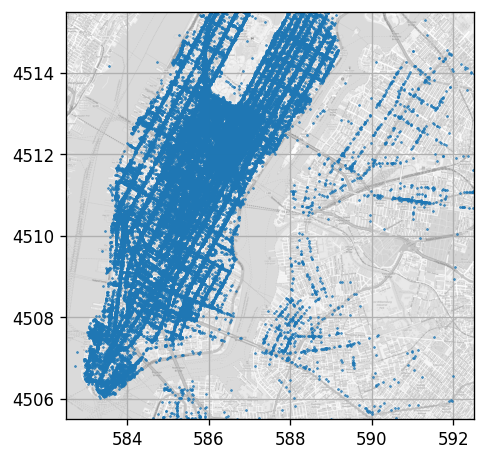

In [ ]:
## Create the figure and axis
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)

## Plot the map
ax.imshow(ny_map_image, extent=bbox, cmap='gray', alpha=0.7)
ax.plot(dataset['pickup_easting'], dataset['pickup_northing'], '.', markersize=1);
fig.savefig('./output/pickups.png')

count    100000.000000
mean         11.397227
std           7.012379
min           0.116667
25%           6.233333
50%           9.900000
75%          14.950000
max          59.666667
Name: duration, dtype: float64


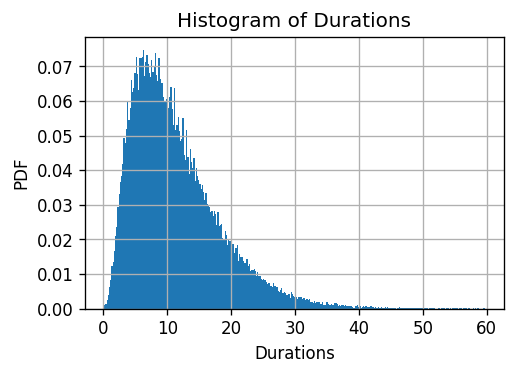

In [ ]:
print(dataset['duration'].describe())

fig, ax = plt.subplots(figsize=(4.5, 3))
dataset['duration'].hist(ax=ax, bins=int(np.sqrt(len(dataset))), density=True)
ax.set_title("Histogram of Durations")
ax.set_xlabel('Durations')
ax.set_ylabel('PDF');
fig.savefig('./output/duration_hist.png')

In [ ]:
## Extract y and x
y = dataset['duration'].values
x = dataset[['pickup_easting', 'pickup_northing', 'dropoff_easting', 'dropoff_northing']].values

$\boldsymbol{\theta}^*_{\mathcal{D}}=$[4.29981579]

The empirical risk is: 32.67452596049187

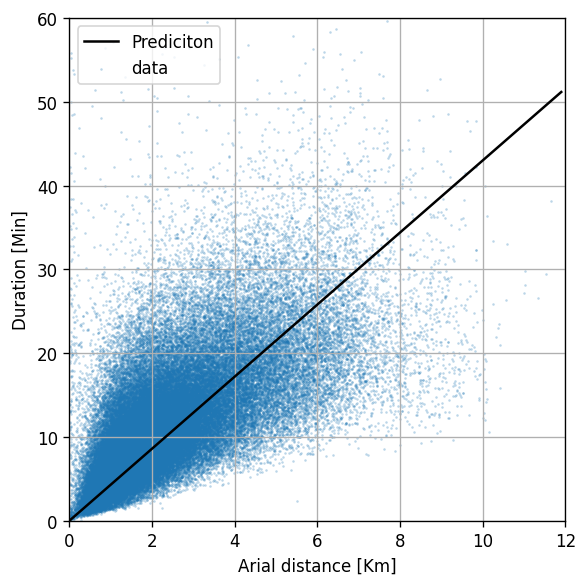

In [ ]:
## Defining augmentation
aug_func = lambda x: (((x[:, 0] - x[:, 2]) ** 2 + (x[:, 1] - x[:, 3]) ** 2) ** 0.5)[:, None]

## Augment the dataset
x_aug = aug_func(x)

## Calcualting theta
theta = np.linalg.inv(x_aug.T @ x_aug) @ (x_aug.T @ y)

## Printing derivation
display(Markdown(r'$\boldsymbol{\theta}^*_{\mathcal{D}}=$' + f'{theta}'))

## Defineing the predictor
h = lambda x: aug_func(x) @ theta

## Calculate the empirical risk
risk = ((h(x) - y) ** 2).mean()
display(Markdown(f'The empirical risk is: {risk}'))

## Ploting
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x_aug[:, 0], y, marker='.', s=1, alpha=0.3, label='data')
ax.set_xlabel('Arial distance [Km]')
ax.set_ylabel('Duration [Min]');
ax.set_xlim(0, 12)
ax.set_ylim(0, 60)
plt.tight_layout()
fig.savefig('./output/duration_vs_dist.png')

dist_grid = np.arange(0, 12, 0.1)
ax.plot(dist_grid, dist_grid * theta[0], 'k', label='Prediciton')
ax.legend(loc='upper left')
fig.savefig('./output/duration_vs_dist_pred.png')

In [ ]:
## Defining augmentation
aug_func = lambda x: np.stack((
    ((x[:, 0] - x[:, 2]) ** 2 + (x[:, 1] - x[:, 3]) ** 2) ** 0.5,
    np.ones(x.shape[0]),
    x[:, 0],
    x[:, 1],
    x[:, 0] * x[:, 1],
    x[:, 0] ** 2,
    x[:, 1] ** 2,
    ), axis=1)

## Augment the dataset
x_aug = aug_func(x)

## Calcualting theta
theta = np.linalg.inv(x_aug.T @ x_aug) @ (x_aug.T @ y)

## Printing derivation
display(Markdown(r'$\boldsymbol{\theta}^*_{\mathcal{D}}=$' + f'{theta}'))

## Defineing the predictor
h = lambda x: aug_func(x) @ theta

## Calculate the empirical risk
risk = ((h(x) - y) ** 2).mean()
display(Markdown(f'The empirical risk is: {risk}'))

$\boldsymbol{\theta}^*_{\mathcal{D}}=$[ 3.07464303e+00 -1.07122656e+06  2.19444267e+02  4.46343460e+02
 -2.98268795e-02 -7.25893948e-02 -4.75227293e-02]

The empirical risk is: 26.416554581589992